<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S5_1_2_Image_Compression_KMeans_Exercice_SOLUTIONS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Compression 

Les KMeans sont très utilisés dans un cas précis qui est la compression d’images. Testons un peu cette fonctionnalité.

0. Importez les librairies usuelles 

In [0]:
import numpy as np
import matplotlib.pyplot as plt

1. Dans Scikit Learn, importez _load_sample_image_ et chargez l’image “china.jpg” ou “flower.jpg”

In [0]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

2. Via matplotlib, visualisez votre image

      a. Indice : On utilisera _imshow_

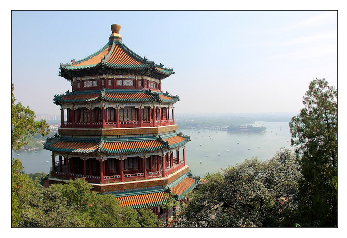

In [0]:
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

  3. Regardez la taille du dataset, trouver la dimension de notre dataset

In [0]:
china.shape

(427, 640, 3)

----> Notre dataset est découpé entre la hauteur du pixel, la largeur du pixel et sa couleur en RGB

4. Divisez votre dataset par 255 puis redimensionnez le en deux dimensions (longueur x largeur, RGB). 

  a. Indice : On pourra utiliser la méthode ```.reshape()```

In [0]:
data = china / 255
data = data.reshape(427 * 640, 3)

5. Nous allons réduire le nombre de couleurs à 16. Pour cela créez un algorithme de KMeans qui prendra 16 clusters.


Au lieu d’utiliser KMeans, vous pouvez utiliser [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html)

In [0]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=16, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

6. Pour chacune des couleurs présentes dans votre dataset, réassignez le code couleur du centroïd du cluster correspondant dans une variable qu’on appellera _new_colors_

In [0]:
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

7. Redimensionnez new_colors pour qu’elle soit à 3 dimensions

In [0]:
china_recolored = new_colors.reshape(china.shape)

8. Visualisez votre nouvelle image avec votre variable _new_colors_

Text(0.5, 1.0, '16-color Image')

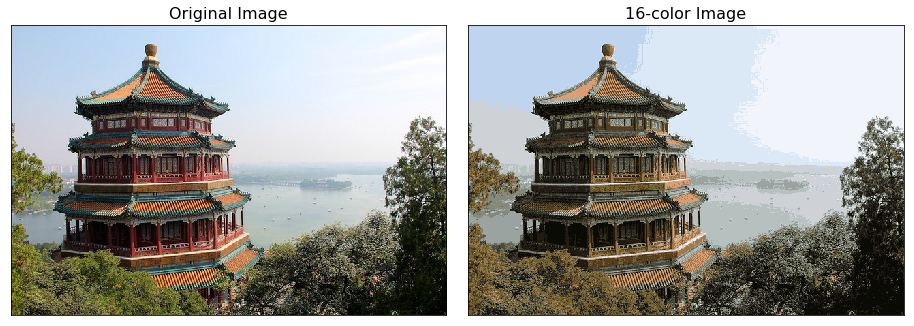

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16)